# **BAHA KIRBAŞOĞLU 21992976**

# **Part 1-) K-NN answers**



In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving WhatsApp Image 2022-10-17 at 10.18.32.jpeg to WhatsApp Image 2022-10-17 at 10.18.32.jpeg
Saving WhatsApp Image 2022-10-17 at 10.18.27.jpeg to WhatsApp Image 2022-10-17 at 10.18.27.jpeg
Saving WhatsApp Image 2022-10-17 at 10.18.23.jpeg to WhatsApp Image 2022-10-17 at 10.18.23.jpeg


In [ ]:
print("Answer-1) Accuracy depends on the quality of the data then if we have more data then before all the time we see the data can have bad quality then the knn depends quality\n we see a poor accuracy. Also, With large data, the prediction stage might be slow. As we know that k-nn algorithm is a bit change with size of data. If we have large size data\nthen we see slower prediction. Require high memory – need to store all of the training data, same if we have large data k-nn will be poor choice and given that it stores all\nof the training, it can be computationally expensive. Lastly, sensitive to the scale of the data and irrelevant features if we have large data again we see the knn algorithms\n accuracy will decrease with insensitive data.")

Answer-1) Accuracy depends on the quality of the data then if we have more data then before all the time we see the data can have bad quality then the knn depends quality
 we see a poor accuracy. Also, With large data, the prediction stage might be slow. As we know that k-nn algorithm is a bit change with size of data. If we have large size data
then we see slower prediction. Require high memory – need to store all of the training data, same if we have large data k-nn will be poor choice and given that it stores all
of the training, it can be computationally expensive. Lastly, sensitive to the scale of the data and irrelevant features if we have large data again we see the knn algorithms
 accuracy will decrease with insensitive data.


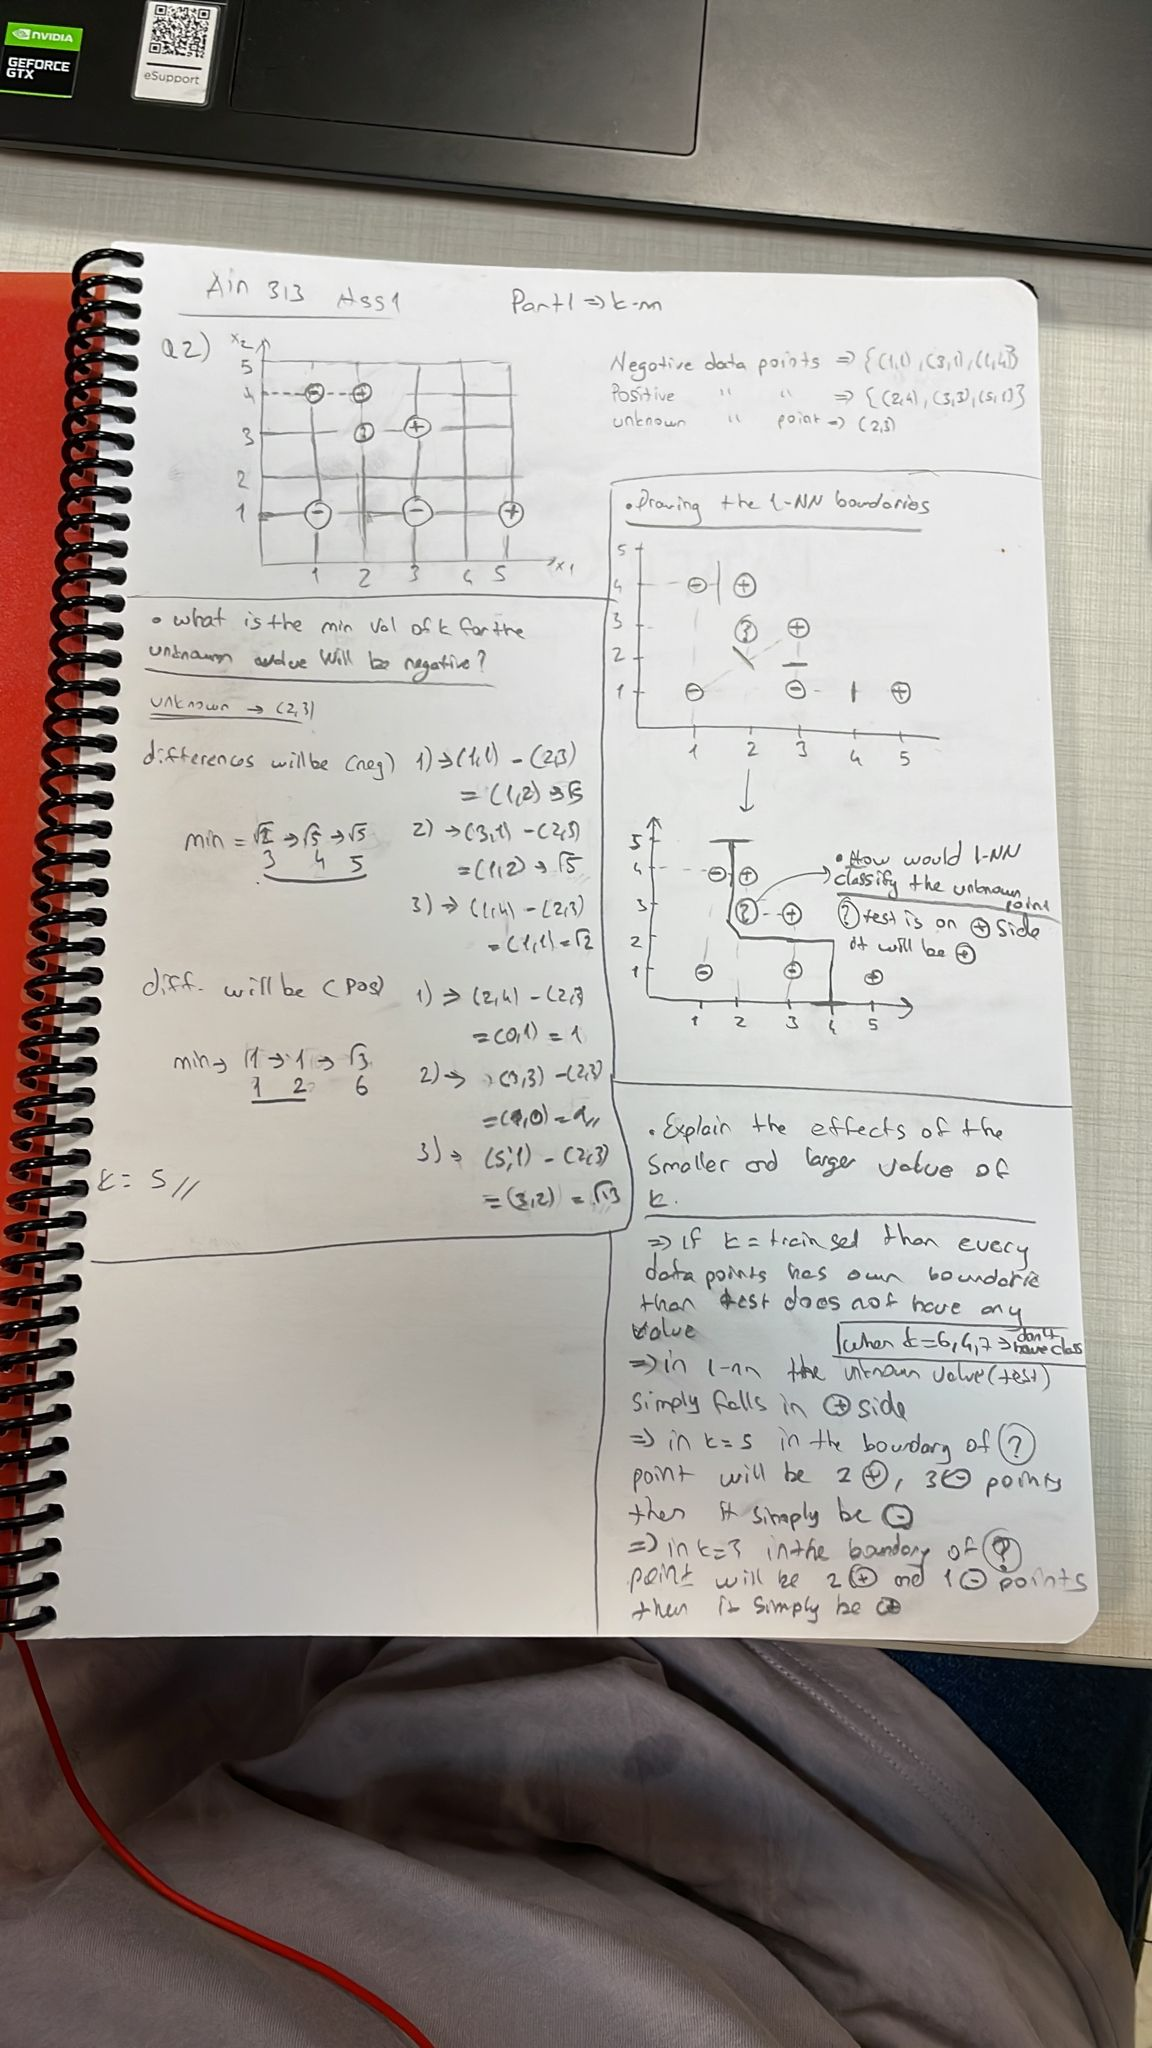

In [ ]:
Image("/content/part1-KNN-Quest2.jpeg",width = 500)



---



# ***Part 1-) Linear Regression answers***

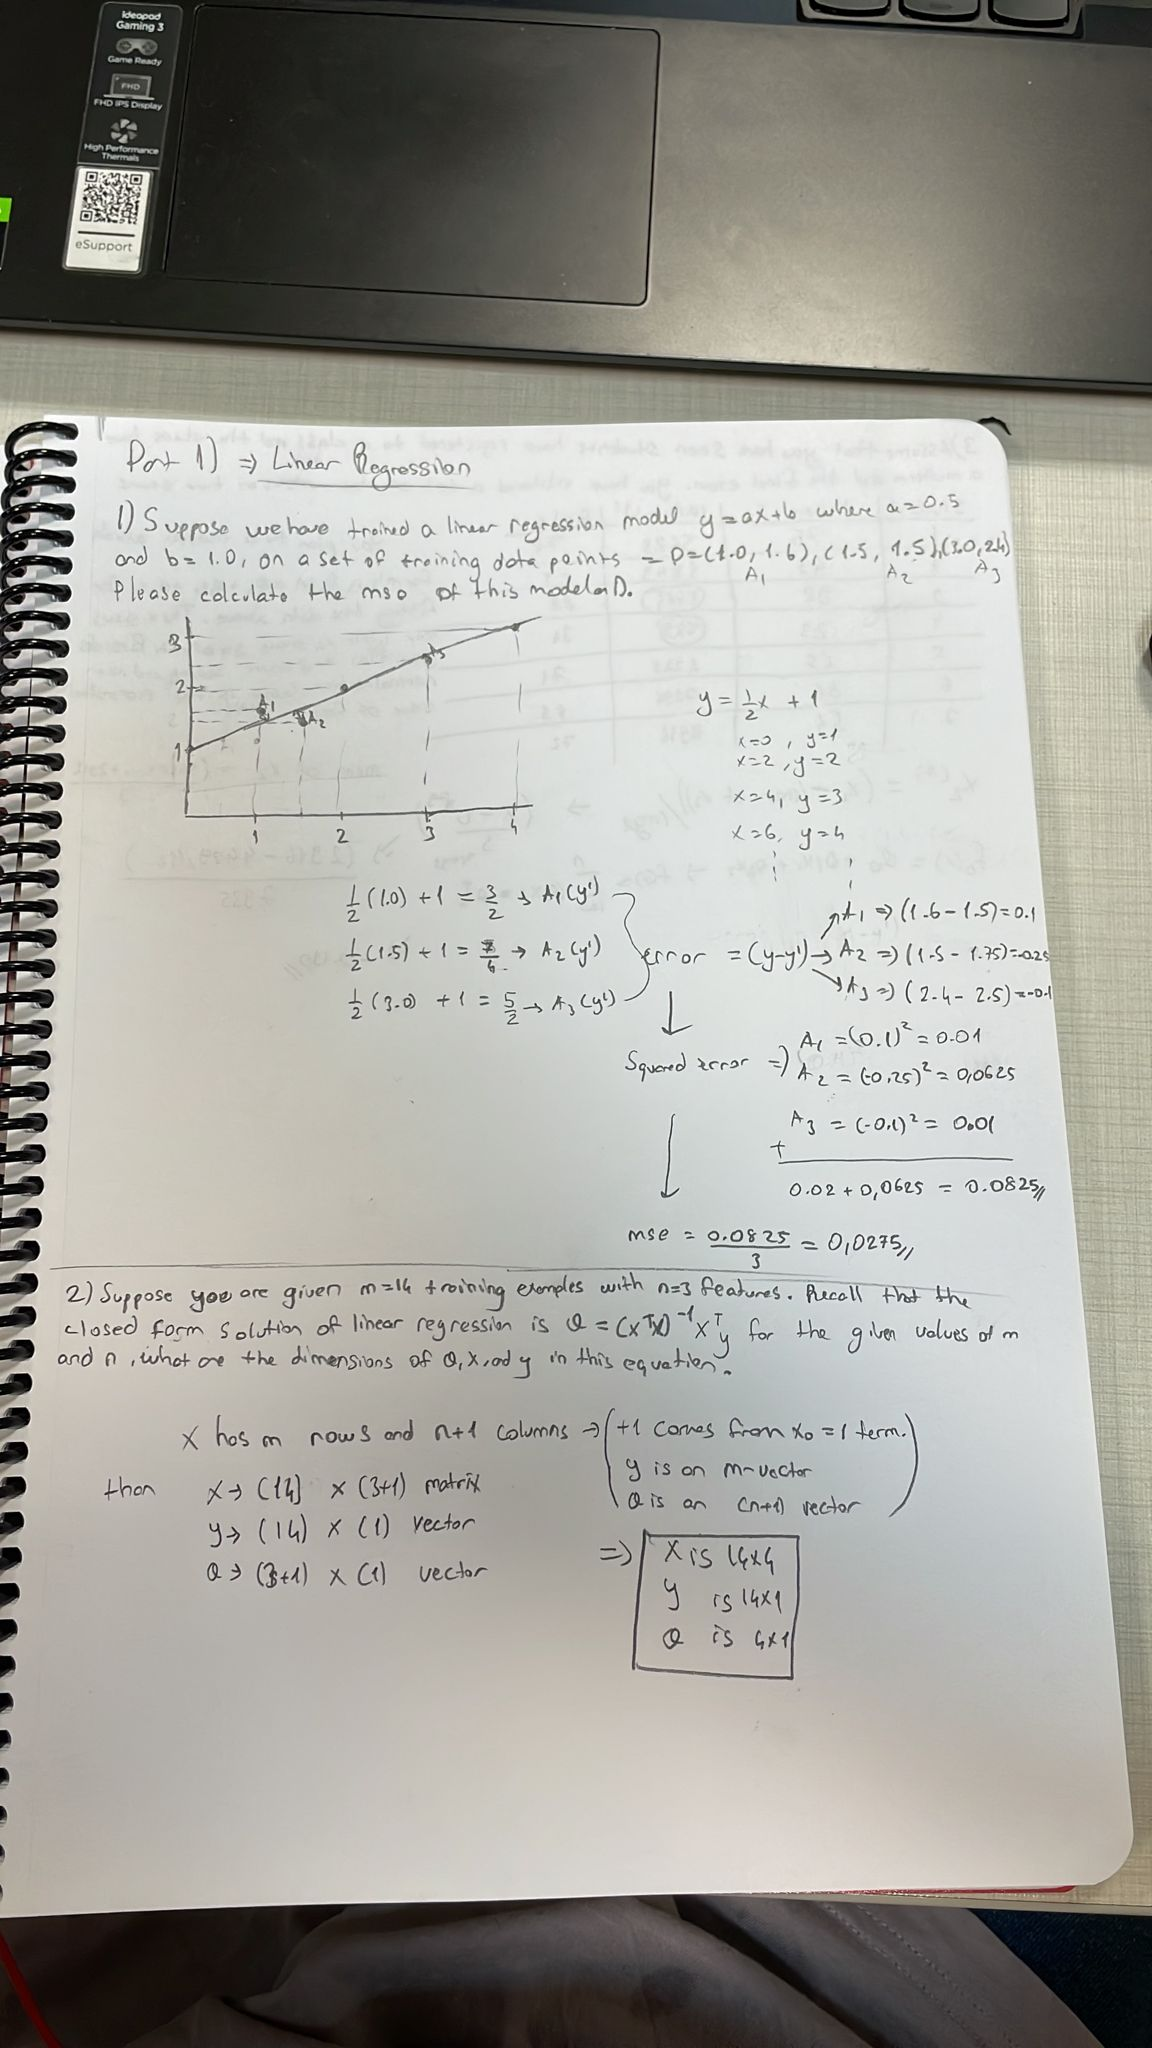

In [ ]:
Image("/content/part1-LinearRegression-Q1,2.jpeg",width = 500)

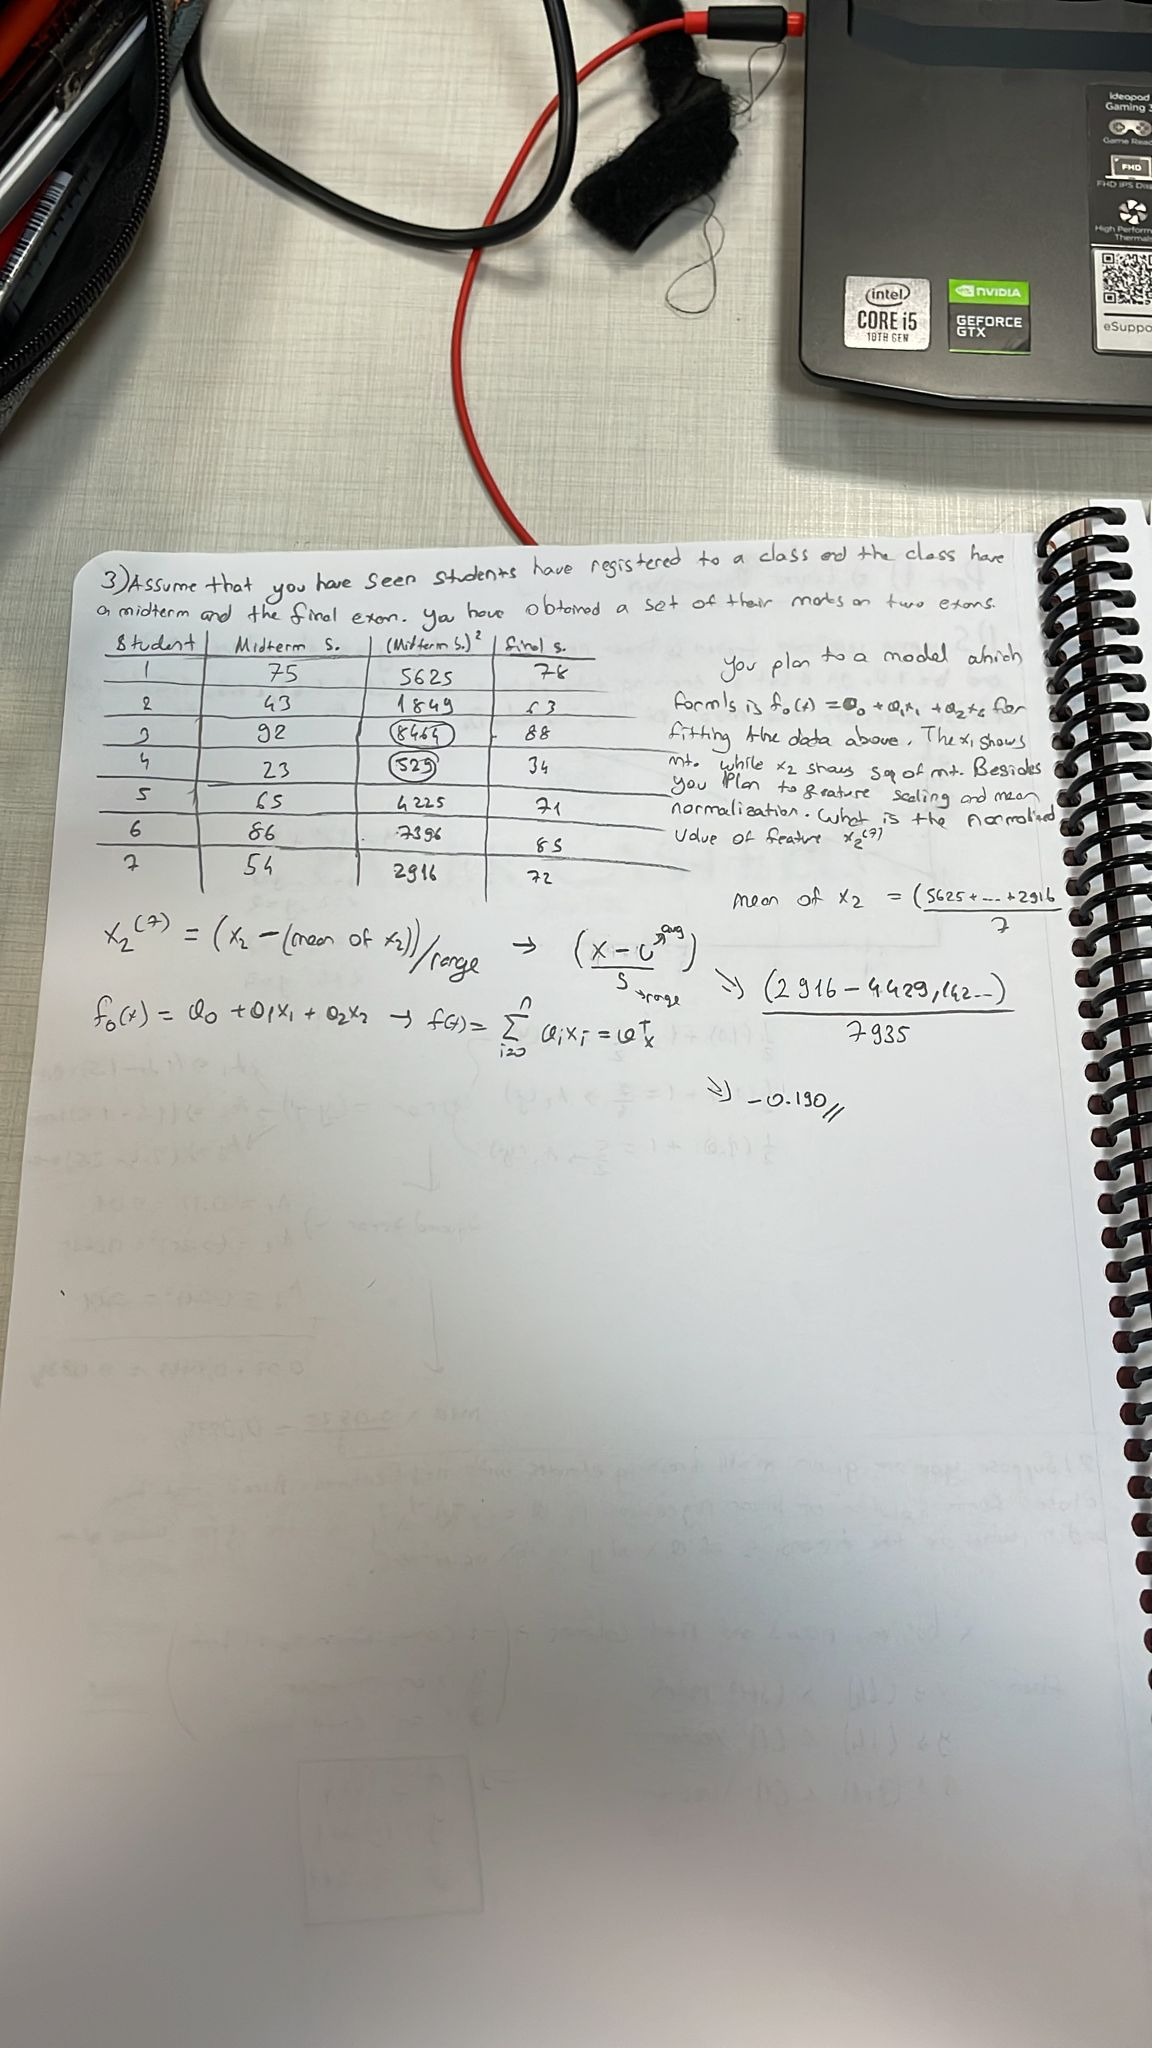

In [ ]:
Image("/content/part1-LinearRegression-Q3.jpeg",width = 500)

##  ***Part-2) Disease Detection from X-Ray Images***

In [3]:
!pip install opencv-python

In [5]:
!pip install google-api-python-client

  Using cached idna-3.4-py3-none-any.whl (61 kB)


In [7]:
!pip install google-colab

  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102297 sha256=7d233cd227cf9de37d9fc3bd9752c916070f3b6b8786b3b0107dabf988e23c90
  Stored in directory: c:\users\bahak\appdata\local\pip\cache\wheels\bf\ed\8e\5d95a614975eba0e18a249c8a3fad29524f9011bf1ced6cafa
  Running setup.py clean for pandas
  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13410 sha256=a4ca5a979903fb2e2115e7623cf25cfc8a2d44943d249f6cda178892d0206d7a
  Stored in directory: c:\users\bahak\appdata\local\pip\cache\wheels\4e\19\2c\b772a272d0977b112ee6559cf6ce2390fb68b670940847770f
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5078 sha256=0ceb76ffc4d9f85b56515da229231167485a5d8323c9e050d8c399e5e8ed220b
  Stored in directory: c:\users\bahak\appdata\local\pip\cache\wheels\6a\88\e8\d4f4d830f0edaf91815bd9714e65b3c57ebc95c4ddfc6416a6
  Created wheel for tornado: filename=tornado-4.5.3-cp310-cp310-win_amd64.whl size=420781

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bahak\.conda\envs\workspace\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\bahak\\AppData\\Local\\Temp\\pip-install-dsd8070y\\pandas_23c1e03e6556447d8ab5d15bfaa27b27\\setup.py'"'"'; __file__='"'"'C:\\Users\\bahak\\AppData\\Local\\Temp\\pip-install-dsd8070y\\pandas_23c1e03e6556447d8ab5d15bfaa27b27\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\bahak\AppData\Local\Temp\pip-wheel-7l04tjgj'
       cwd: C:\Users\bahak\AppData\Local\Temp\pip-install-dsd8070y\pandas_23c1e03e6556447d8ab5d15bfaa27b27\
  Complete output (841 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64

In [10]:
# here is almos all my imported libraries, others below this code line. 
import os

import cv2

from matplotlib import image

from PIL import Image

#from google.colab import files as FILE

from os import listdir

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import argparse


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


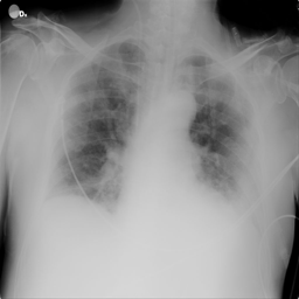

268203

In [ ]:
#Here I connected the drive and I show a sample from images. 

from google.colab.patches import cv2_imshow

from google.colab import drive

#To read and connect drive
drive.mount('/content/drive')
#taking photo from spesific location
img = cv2.imread('/content/drive/MyDrive/chest_xray/train/covid/covid-1.jpg')
#open cv for showing images
cv2_imshow(img)
img.size

In [ ]:
#I have started my project with making dataframes from images. This function makes data frame with canny and gabor feature. 
def makeDataFrame(canny,gabor,y,diseaseName,setName,dim):
  #Firstly, I started a loop at my location to reach all images that I want
  for filename in listdir('/content/drive/MyDrive/chest_xray/'+setName+diseaseName+'/'):
    #Here I read the image 
    disease = cv2.imread('/content/drive/MyDrive/chest_xray/'+setName+diseaseName+'/'+ filename)
    # here I change the type of image to numpy.uint8 because I had an error message that I cant handle the normal type of image. I should have been change the type to use blur and canny
    diseaseCanny = disease.astype(np.uint8)
    #here before the use canny, I blured my images to blur some cables or things I dont need in image. Also, I wanted a smooth image then I change the parameters again and again. I plotted a lot image with different parameters
    # above you can see it
    gaussian_blur = cv2.GaussianBlur(diseaseCanny, (11,11), 0)
    # Here the images was too big to handle than I decided to reduce size 32-32 ->1024 pixels
    res = cv2.resize(gaussian_blur, dim, interpolation=cv2.INTER_LINEAR) 
    #Here I used canny feature for edge detection. I tried 50,150 or 35-100 ... then I find the optimal as 5,10 
    edges = cv2.Canny(res,5,10)
    #I convert my image to one dimension array for placing to the data frame
    oneD_edges = edges.flatten()
    #Here I fill the dataframe with 1d arrays "pixels of my image"
    canny.loc[len(canny.index)] =[oneD_edges]
    #Here after using gaussianblur and canny feature, I decided to use second feature and combine them.  it analyzes whether there is any specific frequency content in the image and I wanted to make the lungs marked.
    #Here is the parameters I used. Again I decided to use these parameters cause I tried a lot of different numbers.
    g_kernel = cv2.getGaborKernel((12, 12), 8.0, np.pi/8, np.pi/2, 0.4, 0, ktype=cv2.CV_32F)
    #Converting the image after gabor
    disease = cv2.cvtColor(disease, cv2.COLOR_BGR2GRAY)
    #Here the gabor filtering operation
    filtered_img = cv2.filter2D(disease, cv2.CV_8UC3, g_kernel)
    #Here again I convert to 1-d array 
    oneD_edges = filtered_img.flatten()
    #and lastly I fill the df with array
    gabor.loc[len(gabor.index)] = [oneD_edges]
    #Here the line just keep the disease Name as label on df
    y.loc[len(y.index)] = [diseaseName]

  return canny,gabor,y

In [ ]:
#Here my dataframes before combining them
dfCannyTrain = pd.DataFrame(columns = ['colorValCanny'])
dfGaborTrain = pd.DataFrame(columns = ['colorValGabor'])
Y_train = pd.DataFrame(columns = ['diseaseName'])
#To make him filled I called function
dfCannyTrain,dfGaborTrain,Y_train = makeDataFrame(dfCannyTrain,dfGaborTrain,Y_train,'pneumonia','train/',(32,32))
dfCannyTrain,dfGaborTrain,Y_train = makeDataFrame(dfCannyTrain,dfGaborTrain,Y_train,'covid','train/',(32,32))
dfCannyTrain,dfGaborTrain,Y_train = makeDataFrame(dfCannyTrain,dfGaborTrain,Y_train,'normal','train/',(32,32))

In [ ]:
dfCannyTrain.head()


,colorValCanny
0,"[0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 255, 0..."
1,"[255, 0, 0, 255, 0, 0, 0, 255, 255, 0, 0, 0, 2..."
2,"[255, 0, 0, 255, 0, 0, 255, 255, 0, 255, 255, ..."
3,"[255, 0, 0, 255, 0, 255, 0, 255, 0, 0, 255, 0,..."
4,"[0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 25..."


In [ ]:
dfGaborTrain.head()

,colorValGabor
0,"[14, 21, 6, 23, 18, 19, 29, 7, 27, 6, 44, 12, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[6, 0, 12, 109, 0, 90, 46, 14, 113, 0, 106, 0,..."
3,"[34, 35, 33, 26, 20, 26, 33, 30, 24, 18, 41, 2..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:

#I combined the canny and gabor arrays in dataframe
X_train = pd.concat([dfCannyTrain, dfGaborTrain], axis=1, join='inner')
display(X_train)

,colorValCanny,colorValGabor
0,"[0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 255, 0...","[14, 21, 6, 23, 18, 19, 29, 7, 27, 6, 44, 12, ..."
1,"[255, 0, 0, 255, 0, 0, 0, 255, 255, 0, 0, 0, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[255, 0, 0, 255, 0, 0, 255, 255, 0, 255, 255, ...","[6, 0, 12, 109, 0, 90, 46, 14, 113, 0, 106, 0,..."
3,"[255, 0, 0, 255, 0, 255, 0, 255, 0, 0, 255, 0,...","[34, 35, 33, 26, 20, 26, 33, 30, 24, 18, 41, 2..."
4,"[0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
2995,"[0, 255, 0, 255, 0, 0, 255, 255, 0, 0, 0, 0, 0...","[76, 0, 0, 0, 77, 0, 0, 255, 0, 0, 255, 0, 0, ..."
2996,"[0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2997,"[0, 0, 0, 255, 0, 255, 255, 0, 0, 0, 255, 0, 0...","[5, 0, 0, 0, 113, 0, 0, 255, 0, 0, 255, 0, 0, ..."
2998,"[0, 0, 0, 255, 0, 0, 0, 0, 255, 0, 0, 255, 0, ...","[74, 0, 0, 0, 112, 0, 0, 255, 0, 0, 255, 0, 0,..."


In [ ]:
display(Y_train)

,diseaseName
0,pneumonia
1,pneumonia
2,pneumonia
3,pneumonia
4,pneumonia
...,...
2995,normal
2996,normal
2997,normal
2998,normal


In [ ]:
#I have done same thing to test set as I do train set
dfCannyTest = pd.DataFrame(columns = ['colorValCanny'])

dfGaborTest = pd.DataFrame(columns = ['colorValGabor'])

Y_test = pd.DataFrame(columns = ['diseaseName'])


dfCannyTest,dfGaborTest,Y_test = makeDataFrame(dfCannyTest,dfGaborTest,Y_test,'pneumonia','test/',(32,32))
dfCannyTest,dfGaborTest,Y_test = makeDataFrame(dfCannyTest,dfGaborTest,Y_test,'covid','test/',(32,32))
dfCannyTest,dfGaborTest,Y_test = makeDataFrame(dfCannyTest,dfGaborTest,Y_test,'normal','test/',(32,32))

In [ ]:
#Here just combining 2 features on df
X_test = pd.concat([dfCannyTest, dfGaborTest], axis=1, join='inner')

display(X_test)

,colorValCanny,colorValGabor
0,"[0, 255, 255, 255, 255, 0, 0, 0, 0, 255, 0, 25...","[17, 18, 17, 17, 19, 14, 19, 17, 14, 21, 14, 2..."
1,"[255, 0, 255, 255, 0, 0, 255, 0, 255, 0, 0, 25...","[8, 8, 9, 8, 11, 9, 6, 12, 7, 9, 10, 7, 11, 6,..."
2,"[0, 255, 255, 0, 0, 255, 0, 0, 255, 255, 255, ...","[31, 0, 18, 9, 0, 25, 0, 16, 3, 8, 13, 6, 14, ..."
3,"[0, 255, 0, 255, 0, 255, 0, 255, 255, 255, 0, ...","[25, 23, 22, 25, 21, 25, 25, 22, 25, 20, 35, 2..."
4,"[0, 255, 0, 0, 255, 0, 0, 0, 0, 255, 255, 255,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
...,...,...
295,"[0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, ...","[134, 0, 94, 72, 0, 138, 0, 62, 54, 68, 81, 48..."
296,"[0, 0, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0, 255...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
297,"[0, 255, 0, 0, 0, 0, 0, 255, 255, 0, 0, 255, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
298,"[0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."


In [ ]:
display(Y_test)


,diseaseName
0,pneumonia
1,pneumonia
2,pneumonia
3,pneumonia
4,pneumonia
...,...
295,normal
296,normal
297,normal
298,normal


In [ ]:
#This is my function to find predicted disease. Finds the most one, if they are equal takes the one which found before the others
from collections import Counter

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

In [ ]:
#Here I calculate euclidean distances before step from the finding neighbors
from math import sqrt
def euclidean_distance(testCanny,trainCanny,testGabor,trainGabor):
	distanceCanny = 0.0
	distanceGabor = 0.0
	for i in range(len(testCanny)):
		#here is the basicly euclidean distance algorithm
		distanceCanny += ((testCanny[i] - trainCanny[i])**2)
		distanceGabor += ((testGabor[i] - trainGabor[i])**2)
	return sqrt(distanceCanny+distanceGabor)

In [ ]:
def euclidean_distance(testCanny,trainCanny,testGabor,trainGabor):
	distanceCanny = 0.0
	distanceGabor = 0.0
	for i in range(len(testCanny)):
		#here is the basicly euclidean distance algorithm
		distanceCanny += ((testCanny[i] - trainCanny[i])**2)
		distanceGabor += ((testGabor[i] - trainGabor[i])**2)
	return sqrt(distanceCanny+distanceGabor)

In [ ]:
#Here I find the nearest neighbors depends to k value. 
def get_neighbors(X_train, testCanny, testGabor, num_neighbors):
	#This is the list saves the distances between pixels
	distances = list()
	distancesForWeightedKNN = list()
	for trainIndex, trainRow in X_train.iterrows():
		#calculate distance with euclidean_distance function
		dist = euclidean_distance(testCanny,trainRow.colorValCanny, testGabor ,trainRow.colorValGabor)
		#adding the results to the list
		distances.append((trainRow.colorValCanny, dist))
		distancesForWeightedKNN.append(dist)	
	#sorting distances to take lowest k 
	distances.sort(key=lambda tup: tup[1])
	#the lowest distances will be the neighbor to my test data
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
		#returns the k neighbor from train
	return neighbors,distancesForWeightedKNN

In [ ]:
#I create new data frame that keeps predictions
Y_pred = pd.DataFrame(columns = ['prediction'])

for i in range(len(X_test.colorValCanny)):
  #getting neighbors for prediction
  neighbors,distances = get_neighbors(X_train,X_test.colorValCanny[i],X_test.colorValGabor[i],3)
  diseases = list()
  for j in range(len(X_train.colorValCanny)):
      for k in range(len(neighbors)):
        # in this code I find the name of the disease from matrix 
        comparison = X_train.colorValCanny[j] == neighbors[k]
        if(comparison.all()):
          diseases.append(Y_train.diseaseName[j])
  count = 0
  #Here the last thing that I write to prediction dataframe which the algorithm predicted
  if(most_frequent(diseases)==Y_test.diseaseName[i]):
    Y_pred.loc[len(Y_pred.index)] = [Y_test.diseaseName[i]]
  else:
    Y_pred.loc[len(Y_pred.index)] = [most_frequent(diseases)]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


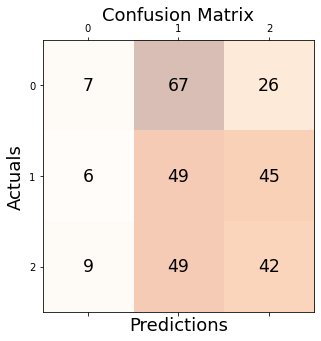

In [ ]:
#Here is the confusion matrix to show pt-nt-pf-nf and under this line precision-recall-accuracy score
#simply have been plotted the 3x3 confusion matrix according to prediction and test dataframe 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Here I printed the score. This is have been progressed to k = 3. 
#precision score = ((7/100)+(6/100)+(9/100))/3 = 0.18
#recall score = ((7/22)+(67/165)+(26/113))/3 = 0.31
print("Precision Score : ",((7/100)+(6/100)+(9/100))/3)
print("Recall Score : ",((7/22)+(67/165)+(26/113))/3)
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

Precision Score :  0.07333333333333333
Recall Score :  0.31811030660588185
Accuracy: 0.320


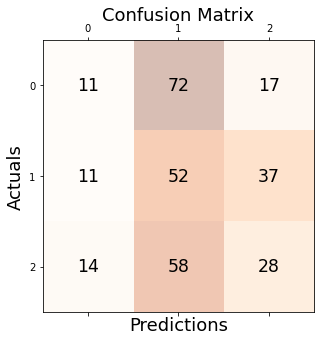

In [ ]:
#Here is the confusion matrix to show pt-nt-pf-nf and under this line precision-recall-accuracy score
#simply have been plotted the 3x3 confusion matrix according to prediction and test dataframe 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Here I printed the score. This is have been progressed to k = 5. 
#precision score = ((11/100)+(11/100)+(34/100))/3 = 0.18
#recall score = ((11/46)+(72/182)+(17/82))/3 = 0.28
print("Precision Score : ",((11/100)+(11/100)+(34/100))/3)
print("Recall Score : ",((11/46)+(72/182)+(17/82))/3)
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

Precision Score :  0.18666666666666668
Recall Score :  0.28068396785257865
Accuracy: 0.303


In [ ]:
#This is my weightedKNN algorithm, same with the normal knn but the only difference, after obtaining distances from the nearest neighbors I divide 1 by distance and add to the frequencies to see which I should select weighted nearst neighbor.
def weightedKNN(k,Y_pred): 
  Y_pred = pd.DataFrame(columns = ['prediction'])

  for i in range(len(X_test.colorValCanny)):
    if(i == 8):
      display(Y_pred)
    #getting neighbors for prediction and also distances which I divide 1 by this distances 
    neighbors,distances = get_neighbors(X_train,X_test.colorValCanny[i],X_test.colorValGabor[i],3)
    diseases = list()
    for j in range(len(X_train.colorValCanny)):
        for k in range(len(neighbors)):
          # in this code I find the name of the disease from matrix 
          comparison = X_train.colorValCanny[j] == neighbors[k]
          if(comparison.all()):
            diseases.append(Y_train.diseaseName[j])
    freqCovid = 0
    freqPneumonia = 0
    freqNormal = 0
    #Here the last thing that I write to prediction dataframe which the algorithm predicted
    for i in range(len(diseases)):
      if(diseases[i]=='covid'):
        freqCovid+=1/distances[i]
      elif(diseases[i]=='pneumonia'):
        freqPneumonia+=1/distances[i]
      elif(diseases[i]=='normal'):
        freqNormal+=1/distances[i]
        #looking the highest frequency to obtain -weightedKNN prediction
    if((freqNormal>freqCovid)and(freqNormal>freqPneumonia)):
      Y_pred.loc[len(Y_pred.index)] = ["normal"]
    if((freqCovid>freqNormal)and(freqCovid>freqPneumonia)):
      Y_pred.loc[len(Y_pred.index)] = ["covid"]      
    if((freqPneumonia>freqNormal)and(freqPneumonia>freqCovid)):
      Y_pred.loc[len(Y_pred.index)] = ["pneumonia"]

  return Y_pred


In [ ]:
#I just take the best k value to WeightedKNN. I also try it 5-7 but optimal was 3 for me
Y_pred = pd.DataFrame(columns = ['prediction'])
Y_predWeighted = weightedKNN(3,Y_pred)

In [ ]:
Y_predWeighted

,prediction
0,covid
1,covid
2,covid
3,normal
4,covid
...,...
295,pneumonia
296,normal
297,normal
298,pneumonia


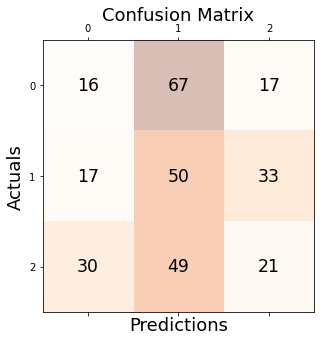

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_predWeighted)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Here I printed the score. This is have been progressed to k = 3 - weighted knn. 
#precision score = ((16/100)+(17/100)+(30/100))/3 = 0.21
#recall score = ((16/63)+(67/168)+(17/71))/3 = 0.3
#Accuracy is correctly calculated. I also calculate by hand below this code line block.
print("Precision Score : ",((16/100)+(17/100)+(30/100))/3)
print("Recall Score : ",((16/63)+(67/168)+(17/71))/3)
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_predWeighted))

Precision Score :  0.21
Recall Score :  0.29740479916536255
Accuracy: 0.290


In [ ]:
def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for i in range(len(y_true.diseaseName)):
      if(y_true.diseaseName[i]==y_pred.prediction[i]):
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [ ]:
accuracy(Y_test, Y_predWeighted)

0.29

In [ ]:
#Error Analyse:
"""
  Firstly, in this experiment I decided to do all the things(algorithm and feature extracting) by hand. I tried the k value (3-5-7) and I see the k=3 was optimal for me.
Also, I tried k=3,5,7 to Weighted KNN but still the optimal was k=3. I think I couldn't find the optimal canny,gabor values but the parameters I wrote the best from I have tried. 
If we think the accuracy and error analyse, using canny have decreased the accuracy very well. More, the images are similar what class they have. If we look at the covid or pneumonia or normal lung
I can't see a big difference. If I should give examples from the images folder.
test/covid13, test/covid45, test/covid70, test/covid73, test/normal44-45, test/penumonia78 I think these from the all images that to estimate is hard, samples I can show. Obviously we see
the pictures are have different features from that all like (dark black, trapezoid, some different organs that marked...)
I just choose the canny and gabor to learn how to use and apply to images. I think the feature that we use is not okay with knn cause of that is the knn takes nearest distances from the train set
but in this assignment we should obtain the true disease. Knn disallows the main idea and accepts the nearest image. If we consider this I have used 2 features one with gaussian filter (for gabor)
Canny provides us marked edge image to see the details on the image. In order to canny we should consider to details on image and predict according these details but knn disallows that again.
Gabor olsa makes more detail on image which we want to see and want to extract from image but this again is just a bit help for knn. The main reason the low accuracy is the 32-32 pixels. If have been done
in 64-64 or 128-128 I would have higher accuracy. The main reason I choose 32-32 that I wrote everything by hand and the all algorithms take my whole time. In progress I tried many different parameters
but the my optimal values are above that I used. If I conclude that my main error is the long compilation time, using my algorithms to all functions that I need. Using optimal but (I think I would have
better accuracy score with different parameters). Also, the images are not okey because the differences and mistakes on the image be obstacle on the true prediction. Lastly I have tried the using one
feature first canny-gabor and after I concatanated them then I see using canny and gabor together also decrease the accuracy. If I advice something to who will make this assignment. I can say 
truly the guy should know what he or she is doing. I prepare this assignment in 2 weeks but I give more time to research what I am doing and what should I do. We must know what we are doing. 


"""

'\n  Firstly, in this experiment I decided to do all the things(algorithm and feature extracting) by hand. I tried the k value (3-5-7) and I see the k=3 was optimal for me.\n\n'